In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

print("Setuo complete")

Setuo complete


In [23]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,87994.0,1210.314,507.2200,222.1872,88702.0,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,URGUP_SIVRISI
1,83725.0,1081.774,403.3418,264.6498,84390.0,326.4996,0.7546,0.9921,0.7482,0.8991,1.5241,0.8095,CERCEVELIK
2,84635.0,1124.284,432.9209,250.5192,85438.0,328.2691,0.8156,0.9906,0.7020,0.8414,1.7281,0.7583,URGUP_SIVRISI
3,90346.0,1173.761,462.2198,250.0358,91444.0,339.1638,0.8411,0.9880,0.7412,0.8241,1.8486,0.7338,CERCEVELIK
4,66894.0,1032.502,413.9267,206.4048,67682.0,291.8426,0.8668,0.9884,0.6249,0.7885,2.0054,0.7051,URGUP_SIVRISI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,59868.0,945.822,372.1563,206.5386,60377.0,276.0911,0.8319,0.9916,0.6774,0.8410,1.8019,0.7419,CERCEVELIK
1996,78148.0,1058.412,399.5385,250.0895,78916.0,315.4380,0.7799,0.9903,0.7417,0.8766,1.5976,0.7895,CERCEVELIK
1997,82001.0,1165.853,486.6008,215.6806,82823.0,323.1206,0.8964,0.9901,0.7453,0.7581,2.2561,0.6640,URGUP_SIVRISI
1998,86589.0,1221.667,510.8797,216.3206,87440.0,332.0370,0.9059,0.9903,0.7396,0.7291,2.3617,0.6499,URGUP_SIVRISI


List of all column and we can also see that there are 2000 instances in trainnig set and 500 instances in test set.

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2000 non-null   float64
 1   Perimeter          2000 non-null   float64
 2   Major_Axis_Length  2000 non-null   float64
 3   Minor_Axis_Length  2000 non-null   float64
 4   Convex_Area        2000 non-null   float64
 5   Equiv_Diameter     2000 non-null   float64
 6   Eccentricity       2000 non-null   float64
 7   Solidity           2000 non-null   float64
 8   Extent             2000 non-null   float64
 9   Roundness          2000 non-null   float64
 10  Aspect_Ration      2000 non-null   float64
 11  Compactness        2000 non-null   float64
 12  Class              2000 non-null   object 
dtypes: float64(12), object(1)
memory usage: 203.3+ KB


Here we can already see that the only categorical column is the target column (Class).

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               500 non-null    float64
 1   Perimeter          500 non-null    float64
 2   Major_Axis_Length  500 non-null    float64
 3   Minor_Axis_Length  500 non-null    float64
 4   Convex_Area        500 non-null    float64
 5   Equiv_Diameter     500 non-null    float64
 6   Eccentricity       500 non-null    float64
 7   Solidity           500 non-null    float64
 8   Extent             500 non-null    float64
 9   Roundness          500 non-null    float64
 10  Aspect_Ration      500 non-null    float64
 11  Compactness        500 non-null    float64
 12  Class              500 non-null    object 
dtypes: float64(12), object(1)
memory usage: 50.9+ KB


Check for null values in the dataset.

In [26]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


So there are no null values in the dataset.

In [27]:
# numbers of instances for each class
print(train_data["Class"].value_counts())
print(test_data["Class"].value_counts())

Class
CERCEVELIK       1037
URGUP_SIVRISI     963
Name: count, dtype: int64
Class
CERCEVELIK       263
URGUP_SIVRISI    237
Name: count, dtype: int64


So the dataset is nearly pefrectly balanced and because of that it is relatively safe to use accuracy as a metric.

In [28]:
# Convert label to numeric value
train_data["Class"] = train_data["Class"].astype("category")
test_data["Class"] = test_data["Class"].astype("category")
train_data["Class"] = train_data["Class"].cat.codes
test_data["Class"] = test_data["Class"].cat.codes
train_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,87994.0,1210.314,507.2200,222.1872,88702.0,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
1,83725.0,1081.774,403.3418,264.6498,84390.0,326.4996,0.7546,0.9921,0.7482,0.8991,1.5241,0.8095,0
2,84635.0,1124.284,432.9209,250.5192,85438.0,328.2691,0.8156,0.9906,0.7020,0.8414,1.7281,0.7583,1
3,90346.0,1173.761,462.2198,250.0358,91444.0,339.1638,0.8411,0.9880,0.7412,0.8241,1.8486,0.7338,0
4,66894.0,1032.502,413.9267,206.4048,67682.0,291.8426,0.8668,0.9884,0.6249,0.7885,2.0054,0.7051,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,59868.0,945.822,372.1563,206.5386,60377.0,276.0911,0.8319,0.9916,0.6774,0.8410,1.8019,0.7419,0
1996,78148.0,1058.412,399.5385,250.0895,78916.0,315.4380,0.7799,0.9903,0.7417,0.8766,1.5976,0.7895,0
1997,82001.0,1165.853,486.6008,215.6806,82823.0,323.1206,0.8964,0.9901,0.7453,0.7581,2.2561,0.6640,1
1998,86589.0,1221.667,510.8797,216.3206,87440.0,332.0370,0.9059,0.9903,0.7396,0.7291,2.3617,0.6499,1


Distribution of the area column.

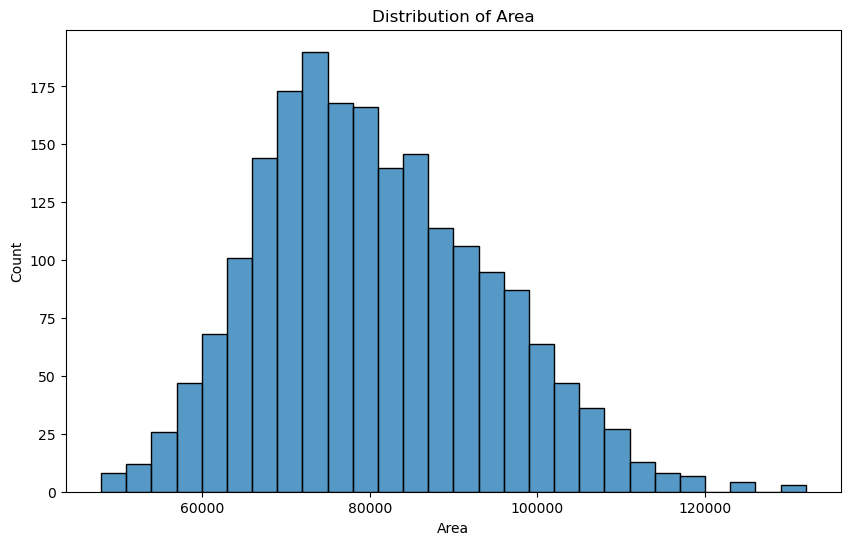

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Area"])
plt.title("Distribution of Area")
plt.show()

Distribution of the perimeter column.

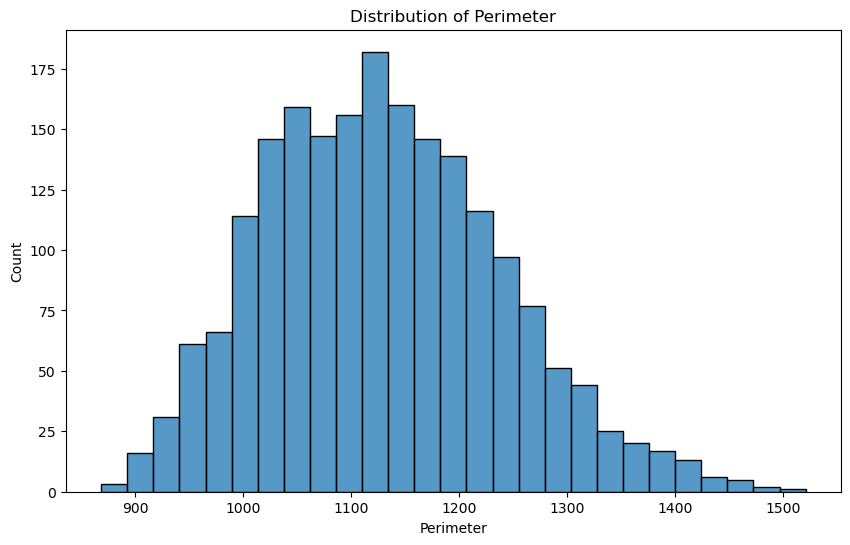

In [30]:
# Distribution of the area column.
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Perimeter"])
plt.title("Distribution of Perimeter")
plt.show()

In [31]:
# Divide the data into features and labels
X_train = train_data.drop("Class", axis=1)
y_train = train_data["Class"]
X_test = test_data.drop("Class", axis=1)
y_test = test_data["Class"]

X_train

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,87994.0,1210.314,507.2200,222.1872,88702.0,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
1,83725.0,1081.774,403.3418,264.6498,84390.0,326.4996,0.7546,0.9921,0.7482,0.8991,1.5241,0.8095
2,84635.0,1124.284,432.9209,250.5192,85438.0,328.2691,0.8156,0.9906,0.7020,0.8414,1.7281,0.7583
3,90346.0,1173.761,462.2198,250.0358,91444.0,339.1638,0.8411,0.9880,0.7412,0.8241,1.8486,0.7338
4,66894.0,1032.502,413.9267,206.4048,67682.0,291.8426,0.8668,0.9884,0.6249,0.7885,2.0054,0.7051
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,59868.0,945.822,372.1563,206.5386,60377.0,276.0911,0.8319,0.9916,0.6774,0.8410,1.8019,0.7419
1996,78148.0,1058.412,399.5385,250.0895,78916.0,315.4380,0.7799,0.9903,0.7417,0.8766,1.5976,0.7895
1997,82001.0,1165.853,486.6008,215.6806,82823.0,323.1206,0.8964,0.9901,0.7453,0.7581,2.2561,0.6640
1998,86589.0,1221.667,510.8797,216.3206,87440.0,332.0370,0.9059,0.9903,0.7396,0.7291,2.3617,0.6499


In [32]:
# Normalization of features

def normalize(X):
    for col in X.columns:
        X[col] = (X[col] - np.mean(X[col])) / np.std(X[col])

normalize(X_train)
normalize(X_test)

X_train

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,0.540159,0.736346,0.908723,-0.159393,0.525769,0.574126,0.853540,0.703504,1.172940,-0.660747,0.775081,-0.844456
1,0.227379,-0.439330,-0.940896,1.667974,0.212164,0.268905,-2.349679,0.731350,0.909812,1.921132,-1.635071,1.983409
2,0.294052,-0.050517,-0.414221,1.059867,0.288383,0.334607,-0.996518,0.313666,0.154749,0.888022,-0.987027,1.015583
3,0.712485,0.402018,0.107465,1.039064,0.725190,0.739129,-0.430853,-0.410318,0.795409,0.578269,-0.604236,0.552464
4,-1.005793,-0.889990,-0.752425,-0.838584,-1.002982,-1.017916,0.139249,-0.298936,-1.105325,-0.059144,-0.106132,0.009952
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.520573,-1.682799,-1.496174,-0.832826,-1.534263,-1.602772,-0.634936,0.592122,-0.247298,0.880861,-0.752587,0.705577
1996,-0.181236,-0.653008,-1.008616,1.041375,-0.185951,-0.141814,-1.788450,0.230130,0.803580,1.518273,-1.401584,1.605352
1997,0.101065,0.329689,0.541585,-0.439403,0.098199,0.143442,0.795865,0.174439,0.862416,-0.603452,0.690264,-0.766954
1998,0.437218,0.840185,0.973887,-0.411860,0.433985,0.474509,1.006603,0.230130,0.769259,-1.122692,1.025722,-1.033484


In [33]:
# Divide training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(f"X train shape: {X_train.shape}")
print(f"X validation shape: {X_val.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y validation shape: {y_val.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (1500, 12)
X validation shape: (500, 12)
y train shape: (1500,)
y validation shape: (500,)
X test shape: (500, 12)
y test shape: (500,)


Train Naive Bayes classifier.

In [34]:
# create naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)
train_acc = accuracy_score(y_train, clf.predict(X_train))
print(f"Train Accuracy = {train_acc}")
y_pred = clf.predict(X_val)
test_acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy = {test_acc}")

Train Accuracy = 0.864
Validation Accuracy = 0.868


Because the difference between accuracy scores on training and validation sets are not that big, we can say that the model is not overfitting.

In [36]:
# create random forest classifier
from sklearn.ensemble import RandomForestClassifier

max_depth = [3, 5, 7, 9]

for depth in max_depth:
    forest = RandomForestClassifier(max_depth=depth)
    forest.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, forest.predict(X_train))
    print(f"Max Depth: {depth}")
    print(f"Train Accuracy = {train_acc}")
    y_pred = forest.predict(X_val)
    test_acc = accuracy_score(y_val, y_pred)
    print(f"Validation Accuracy = {test_acc}")


Max Depth: 3
Train Accuracy = 0.8826666666666667
Validation Accuracy = 0.872
Max Depth: 5
Train Accuracy = 0.9086666666666666
Validation Accuracy = 0.876
Max Depth: 7
Train Accuracy = 0.9373333333333334
Validation Accuracy = 0.886
Max Depth: 9
Train Accuracy = 0.96
Validation Accuracy = 0.892


We can notice that models amount of overfit increase with the increase of the max depth of the trees.
Max depth of the trees that gives the best results is 9. Now we will train model on both train and validation data and test it on test set.

In [40]:
# Train random forest classifier with max depth 9 on both training and validation data and test on test data
forest = RandomForestClassifier(max_depth=9)
forest.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))
train_acc = accuracy_score(pd.concat([y_train, y_val], axis=0), forest.predict(pd.concat([X_train, X_val], axis=0)))
print(f"Train Accuracy = {train_acc}")
y_pred = forest.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy = {test_acc}")

Train Accuracy = 0.9595
Test Accuracy = 0.89


Now we are going to define and train neural net.

In [43]:
# create small NN model using tesnorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[-1], ), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                208       


                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# train NN model
history = model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, validation_data=(X_val, y_val))

Epoch 1/500
94/94 [==============================] - 1s 3ms/step - loss: 0.5865 - accuracy: 0.7407 - val_loss: 0.4304 - val_accuracy: 0.8540
Epoch 2/500
94/94 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8660 - val_loss: 0.3225 - val_accuracy: 0.8700
Epoch 3/500
94/94 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8707 - val_loss: 0.2970 - val_accuracy: 0.8720
Epoch 4/500
94/94 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8693 - val_loss: 0.2860 - val_accuracy: 0.8820
Epoch 5/500
94/94 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8700 - val_loss: 0.2774 - val_accuracy: 0.8840
Epoch 6/500
94/94 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8733 - val_loss: 0.2752 - val_accuracy: 0.8820
Epoch 7/500
94/94 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8740 - val_loss: 0.2707 - val_accuracy: 0.8900
Epoch 8/500
9

<Axes: >

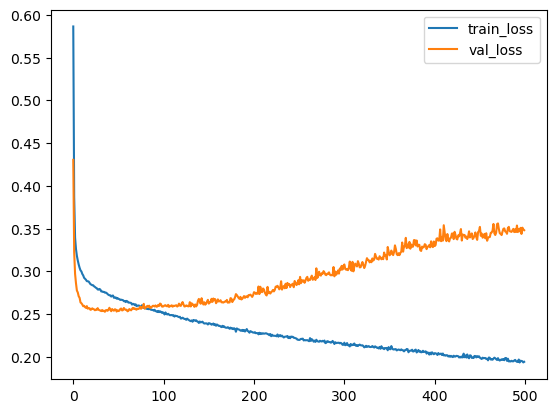

In [47]:
losses = pd.DataFrame({"train_loss": history.history["loss"], "val_loss": history.history["val_loss"]})
losses.plot()

<Axes: >

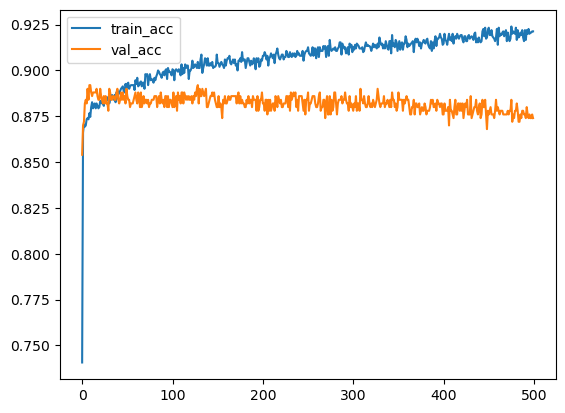

In [48]:
acc = pd.DataFrame({"train_acc": history.history["accuracy"], "val_acc": history.history["val_accuracy"]})
acc.plot()

From these two charts we can conclude that model starts to overfit after around 100 epochs.

In [49]:
# Train NN model on both training and validation data and test on test data
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[-1], ), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0), epochs=500, batch_size=16, verbose=1)

Epoch 1/500
125/125 [==============================] - 1s 854us/step - loss: 0.6150 - accuracy: 0.6730
Epoch 2/500
125/125 [==============================] - 0s 839us/step - loss: 0.3530 - accuracy: 0.8550
Epoch 3/500
125/125 [==============================] - 0s 782us/step - loss: 0.3218 - accuracy: 0.8615
Epoch 4/500
125/125 [==============================] - 0s 845us/step - loss: 0.3128 - accuracy: 0.8660
Epoch 5/500
125/125 [==============================] - 0s 878us/step - loss: 0.3070 - accuracy: 0.8715
Epoch 6/500
125/125 [==============================] - 0s 764us/step - loss: 0.3018 - accuracy: 0.8755
Epoch 7/500
125/125 [==============================] - 0s 714us/step - loss: 0.2984 - accuracy: 0.8760
Epoch 8/500
125/125 [==============================] - 0s 701us/step - loss: 0.2972 - accuracy: 0.8785
Epoch 9/500
125/125 [==============================] - 0s 822us/step - loss: 0.2944 - accuracy: 0.8785
Epoch 10/500
125/125 [==============================] - 0s 800us/step - l

In [50]:
# FInal accuracy on test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy = {test_acc}")

16/16 [==============================] - 0s 772us/step
Test Accuracy = 0.854


Now we will create the model that manages to get accuracy score on test set above 0.9.

In [51]:
# Let's build another neural net and train it on less number of epochs on whole training and validation data
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[-1], ), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0), epochs=50, batch_size=16, verbose=1)

Epoch 1/50
125/125 [==============================] - 1s 933us/step - loss: 0.4786 - accuracy: 0.8135
Epoch 2/50
125/125 [==============================] - 0s 830us/step - loss: 0.3252 - accuracy: 0.8675
Epoch 3/50
125/125 [==============================] - 0s 912us/step - loss: 0.3094 - accuracy: 0.8730
Epoch 4/50
125/125 [==============================] - 0s 866us/step - loss: 0.3027 - accuracy: 0.8780
Epoch 5/50
125/125 [==============================] - 0s 844us/step - loss: 0.2991 - accuracy: 0.8790
Epoch 6/50
125/125 [==============================] - 0s 802us/step - loss: 0.2957 - accuracy: 0.8770
Epoch 7/50
125/125 [==============================] - 0s 835us/step - loss: 0.2928 - accuracy: 0.8760
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8850
Epoch 9/50
125/125 [==============================] - 0s 804us/step - loss: 0.2880 - accuracy: 0.8795
Epoch 10/50
125/125 [==============================] - 0s 889us/step - loss: 0.2863 

In [52]:
# Final accuracy on test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy = {test_acc}")

16/16 [==============================] - 0s 798us/step
Test Accuracy = 0.908


And this model is good enough to beat the set benchmark.